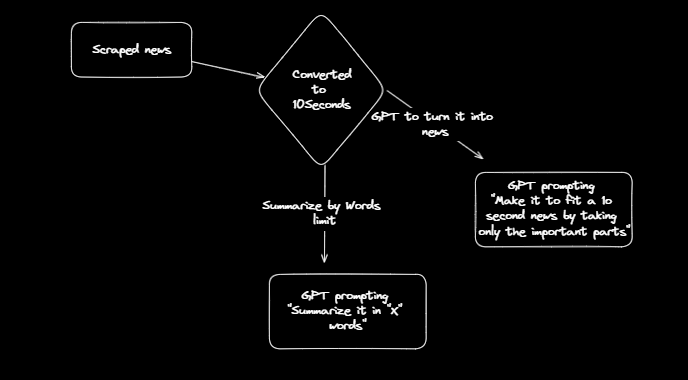

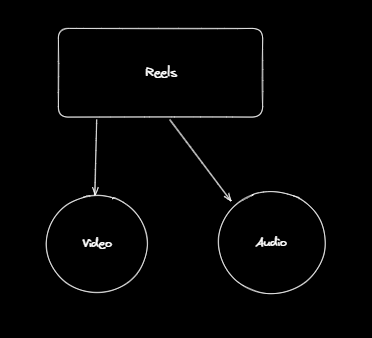

# Get News

we are using inshorts scrapper from : https://github.com/cyberboysumanjay/Inshorts-News-API

Thnx Sumanjay 

In [1]:

import datetime
import uuid
import requests
import pytz


headers = {
    'authority': 'inshorts.com',
    'accept': '*/*',
    'accept-language': 'en-GB,en;q=0.5',
    'content-type': 'application/json',
    'referer': 'https://inshorts.com/en/read',
    'sec-ch-ua': '"Not/A)Brand";v="99", "Brave";v="115", "Chromium";v="115"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"macOS"',
    'sec-fetch-dest': 'empty',
    'sec-fetch-mode': 'cors',
    'sec-fetch-site': 'same-origin',
    'sec-gpc': '1',
    'user-agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36',
}

params = (
    ('category', 'top_stories'),
    ('max_limit', '10'),
    ('include_card_data', 'true')
)


def getNews(category):
    if category == 'all':
        response = requests.get(
            'https://inshorts.com/api/en/news?category=all_news&max_limit=10&include_card_data=true')
    else:
        response = requests.get(
            f'https://inshorts.com/api/en/search/trending_topics/{category}', headers=headers, params=params)
    try:
        news_data = response.json()['data']['news_list']
    except Exception as e:
        print(response.text)
        news_data = None

    newsDictionary = {
        'success': True,
        'category': category,
        'data': []
    }

    if not news_data:
        newsDictionary['success'] = response.json()['error']
        newsDictionary['error'] = 'Invalid Category'
        return newsDictionary

    for entry in news_data:
        try:
            news = entry['news_obj']
            author = news['author_name']
            title = news['title']
            imageUrl = news['image_url']
            url = news['shortened_url']
            content = news['content']
            timestamp = news['created_at'] / 1000
            dt_utc = datetime.datetime.utcfromtimestamp(timestamp)
            tz_utc = pytz.timezone('UTC')
            dt_utc = tz_utc.localize(dt_utc)
            tz_ist = pytz.timezone('Asia/Kolkata')
            dt_ist = dt_utc.astimezone(tz_ist)
            date = dt_ist.strftime('%A, %d %B, %Y')
            time = dt_ist.strftime('%I:%M %p').lower()
            readMoreUrl = news['source_url']

            newsObject = {
                'id': uuid.uuid4().hex,
                'title': title,
                'imageUrl': imageUrl,
                'url': url,
                'content': content,
                'author': author,
                'date': date,
                'time': time,
                'readMoreUrl': readMoreUrl
            }
            newsDictionary['data'].append(newsObject)
        except Exception:
            print(entry)
    return newsDictionary

In [2]:
news= getNews("business")

In [3]:
news

{'success': True,
 'category': 'business',
 'data': [{'id': 'edb21490e3d54c81a9c427ff1146e4b5',
   'title': 'People now keenly watch VIX index instead of poverty index: FM',
   'imageUrl': 'https://nis-gs.pix.in/inshorts/images/v1/variants/jpg/m/2024/05_may/15_wed/img_1715786073362_22.jpg?',
   'url': 'https://shrts.in/JjcjW',
   'content': 'Finance Minister Nirmala Sitharaman said, "There used to be a poverty index...a human development index and all of them continue, but today what is keenly watched is VIX, the volatility index of the markets." Stability of the government is important for markets to be efficient, she stated. PM Narendra Modi\'s third term will make markets function with stability, she added.',
   'author': 'Mansi Agarwal',
   'date': 'Wednesday, 15 May, 2024',
   'time': '09:15 pm',
   'readMoreUrl': 'https://twitter.com/ANI/status/1790380094520713666?utm_campaign=fullarticle&utm_medium=referral&utm_source=inshorts'},
  {'id': '0a658c021cf6494d9be0e27900fc40f4',
   '

In [4]:
articles = []
for item in news['data']:
  articles.append({
    'title': item['title'],
    'content': item['content'],
    'date': item['date'],
    'time': item['time']
  })

In [5]:
articles

[{'title': 'People now keenly watch VIX index instead of poverty index: FM',
  'content': 'Finance Minister Nirmala Sitharaman said, "There used to be a poverty index...a human development index and all of them continue, but today what is keenly watched is VIX, the volatility index of the markets." Stability of the government is important for markets to be efficient, she stated. PM Narendra Modi\'s third term will make markets function with stability, she added.',
  'date': 'Wednesday, 15 May, 2024',
  'time': '09:15 pm'},
 {'title': "'China is awesome,' says Musk after US hikes tariffs on Chinese EVs",
  'content': 'Billionaire Tesla CEO Elon Musk praised China after the US hiked tariffs on $18 billion worth of Chinese imports, including electric vehicles and solar cells. "China is awesome. Those who have not visited have no idea. Compare high-speed rail there and here," Musk said. The US will hike tariffs on imported Chinese EVs from 25% to 100%.',
  'date': 'Wednesday, 15 May, 2024'

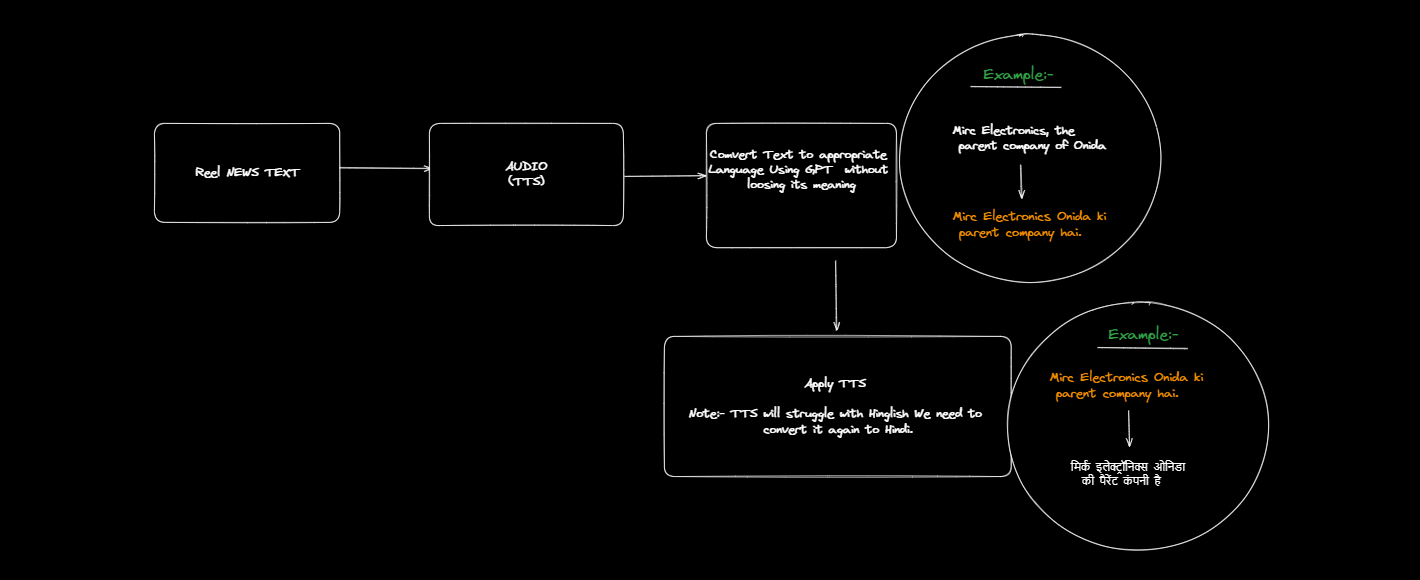

# Convert NEWS

In [6]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser


llm = ChatOpenAI(model="gpt-4o", temperature=0)
output_parser = StrOutputParser()

Convert text to hinglish then to hindi as TTS struggles with hinglish while it remains perfect with hindi

In [24]:
prompt_ENG_to_HING = ChatPromptTemplate.from_messages([
    ("system", "convert the below news in Hinglish  spoken by an indian male in his 30s make it formal as it is an news. remember to add punctuations"),
    ("user", "{input}")
])

prompt_HING_to_HINDI = ChatPromptTemplate.from_messages([
    ("system", """donot translate and convert this to hindi devnagri script     
     NOTE convert to हिंदी without translating you 

     example:-  
     "Reliance Industries Ltd (RIL) apni nai brand Wyzr ko domestic consumer electronics aur home appliances market mein expand karne ke liye, domestic contract manufacturers Dixon Technologies aur Mirc Electronics, jo Onida ki parent company hai, ke saath production agreements ke liye negotiations finalise kar rahi hai, Economic Times (ET) ne report kiya."
     is converted to
     "रिलायंस इंडस्ट्रीज लिमिटेड (आरआईएल) अपनी नई ब्रांड वाइज़्र को डोमेस्टिक कंज्यूमर इलेक्ट्रॉनिक्स और होम अप्लायंसेज मार्केट में एक्सपैंड करने के लिए, डोमेस्टिक कॉन्ट्रैक्ट मैन्युफैक्चरर्स डिक्सन टेक्नोलॉजीज और मिर्क इलेक्ट्रॉनिक्स, जो ओनिडा की पेरेंट कंपनी है, के साथ प्रोडक्शन एग्रीमेंट्स के लिए नेगोशिएशंस फाइनलाइज कर रही है, इकोनॉमिक टाइम्स (ईटी) ने रिपोर्ट किया।"

            """),

    ("user", "{input}")
])

In [25]:
chain1 = prompt_ENG_to_HING | llm | output_parser
chain2 = prompt_HING_to_HINDI | llm | output_parser

In [10]:
# News= """
#         Reliance Industries Ltd (RIL) is finalising negotiations for production agreements with domestic contract manufacturers Dixon Technologies and Mirc Electronics, the parent company of Onida, to expand its new brand Wyzr in the domestic consumer electronics and home appliances market, the Economic Times (ET) reported.
# """

In [11]:
# Hinglish=chain1.invoke({"input": News})
# print(Hinglish)

In [12]:
# Hindi=chain2.invoke({"input": Hinglish})
# print(Hindi)

GPT 3.5 cannot Translate 

GPT 4 Hinglish translation is bad as it is changing the meaning of the senetences

GPT 4o is the best one yet 


In [13]:
converted_news=[]
for item in articles:
  Hinglish=chain1.invoke({"input": item['content']})
  Hindi=chain2.invoke({"input": Hinglish})
  converted_news.append({
    'title': item['title'],
    'content': item['content'],
    'Hinglish':Hinglish,
    'Hindi': Hindi
  })


  
  

In [14]:
for item in converted_news:
  print("Title: ",item['title'])
  print("content: ",item['content'])
  print("Hinglish: ",item['Hinglish'])
  print("Hindi: ",item['Hindi'])
  print("\n\n")


Title:  People now keenly watch VIX index instead of poverty index: FM
content:  Finance Minister Nirmala Sitharaman said, "There used to be a poverty index...a human development index and all of them continue, but today what is keenly watched is VIX, the volatility index of the markets." Stability of the government is important for markets to be efficient, she stated. PM Narendra Modi's third term will make markets function with stability, she added.
Hinglish:  Finance Minister Nirmala Sitharaman ne kaha, "Pehle ek poverty index hota tha...ek human development index hota tha aur yeh sab ab bhi hain, lekin aaj jo sabse zyada dekha ja raha hai, woh hai VIX, jo markets ka volatility index hai." Unhone kaha ki sarkar ki stability markets ke efficient hone ke liye zaroori hai. PM Narendra Modi ka teesra term markets ko stability ke saath function karne mein madad karega, unhone joda.
Hindi:  फाइनेंस मिनिस्टर निर्मला सीतारमण ने कहा, "पहले एक पॉवर्टी इंडेक्स होता था...एक ह्यूमन डेवलपमेंट इंड

# TTS

In [18]:
from dotenv import load_dotenv
# loading variables from .env file
load_dotenv() 

True

In [19]:
import os
import uuid
from elevenlabs import VoiceSettings
from elevenlabs.client import ElevenLabs

ELEVENLABS_API_KEY = os.getenv("ELEVENLABS_API_KEY")
client = ElevenLabs(
    api_key=ELEVENLABS_API_KEY,
)

In [20]:
response = client.voices.get_all()
audio = client.generate(text="Hello there!", voice=response.voices[0])
print(response.voices)

[Voice(voice_id='21m00Tcm4TlvDq8ikWAM', name='Rachel', samples=None, category='premade', fine_tuning=FineTuningResponse(is_allowed_to_fine_tune=False, finetuning_state='not_started', verification_failures=[], verification_attempts_count=0, manual_verification_requested=False, language=None, finetuning_progress={}, message=None, dataset_duration_seconds=None, verification_attempts=None, slice_ids=None, manual_verification=None), labels={'accent': 'american', 'description': 'calm', 'age': 'young', 'gender': 'female', 'use case': 'narration'}, description=None, preview_url='https://storage.googleapis.com/eleven-public-prod/premade/voices/21m00Tcm4TlvDq8ikWAM/df6788f9-5c96-470d-8312-aab3b3d8f50a.mp3', available_for_tiers=[], settings=None, sharing=None, high_quality_base_model_ids=[], safety_control=None, voice_verification=VoiceVerificationResponse(requires_verification=False, is_verified=False, verification_failures=[], verification_attempts_count=0, language=None, verification_attempts=

In [32]:
def text_to_speech_file(text: str) -> str:
    # Calling the text_to_speech conversion API with detailed parameters
    response = client.text_to_speech.convert(
        voice_id="zT03pEAEi0VHKciJODfn",
        optimize_streaming_latency="0",
        output_format="mp3_22050_32",
        text=text,
        model_id="eleven_multilingual_v2", 
        voice_settings=VoiceSettings(
            stability=0.5,
            similarity_boost=0.75,
            style=0.0,
            use_speaker_boost=True,
        ),
    )

    save_file_path = f"{uuid.uuid4()}.mp3"

    # Writing the audio to a file
    with open(save_file_path, "wb") as f:
        for chunk in response:
            if chunk:
                f.write(chunk)

    print(f"{save_file_path}: A new audio file was saved successfully!")
    print(text)

    # Return the path of the saved audio file
    return save_file_path

In [33]:
# text_to_speech_file(Hindi)

In [34]:
Voice_location=[]
for item in converted_news:
  location=text_to_speech_file(item['Hindi'])
  Voice_location.append({
    'title': item['title'],
    'content': item['content'],
    'Hinglish':Hinglish,
    'Hindi': Hindi,
    'location':location
  })

f3f06f17-7fb7-4e8d-90d6-0c5ce41ba347.mp3: A new audio file was saved successfully!
फाइनेंस मिनिस्टर निर्मला सीतारमण ने कहा, "पहले एक पॉवर्टी इंडेक्स होता था...एक ह्यूमन डेवलपमेंट इंडेक्स होता था और ये सब अब भी हैं, लेकिन आज जो सबसे ज्यादा देखा जा रहा है, वो है VIX, जो मार्केट्स का वोलैटिलिटी इंडेक्स है।" उन्होंने कहा कि सरकार की स्टेबिलिटी मार्केट्स के एफिशिएंट होने के लिए जरूरी है। पीएम नरेंद्र मोदी का तीसरा टर्म मार्केट्स को स्टेबिलिटी के साथ फंक्शन करने में मदद करेगा, उन्होंने जोड़ा।
0ad674a2-e6f0-45f2-8bd2-497265761bcf.mp3: A new audio file was saved successfully!
बिलियनेयर टेस्ला सीईओ एलन मस्क ने चाइना की तारीफ की है, जब यूएस ने $18 बिलियन के चाइनीज इम्पोर्ट्स, जिसमें इलेक्ट्रिक व्हीकल्स और सोलर सेल्स शामिल हैं, पर टैरिफ्स बढ़ा दिए। "चाइना ऑसम है। जिन लोगों ने वहां विजिट नहीं किया, उन्हें बिलकुल आइडिया नहीं है। वहां के हाई-स्पीड रेल को यहां से कंपेयर करके देखो," मस्क ने कहा। यूएस इम्पोर्टेड चाइनीज ईवीज पर टैरिफ्स 25% से बढ़ा कर 100% कर देगा।
d0946147-130c-4153-a9f5-fb454a611e42.mp

In [38]:
for item in Voice_location:
  print("Title: ",item['title'])
  print("content: ",item['content'])
  print("Hinglish: ",item['Hinglish'])
  print("Hindi: ",item['Hindi'])
  print("location: ",item['location'])
  print("\n\n")

1
Title:  People now keenly watch VIX index instead of poverty index: FM
content:  Finance Minister Nirmala Sitharaman said, "There used to be a poverty index...a human development index and all of them continue, but today what is keenly watched is VIX, the volatility index of the markets." Stability of the government is important for markets to be efficient, she stated. PM Narendra Modi's third term will make markets function with stability, she added.
Hinglish:  Tokenisation financial giants ko $27 trillion Treasury market mein entry karne ka mauka dega, S&P Global Ratings kehti hai. BlackRock aur Franklin Templeton ke efforts se confidence badh sakta hai, lekin legal hurdles abhi bhi hain. Franklin Templeton, JPMorgan, aur Visa bhi un industry giants mein shamil hain jo is opportunity ko grab kar rahe hain.
Hindi:  टोकनाइजेशन फाइनेंशियल जायंट्स को $27 ट्रिलियन ट्रेजरी मार्केट में एंट्री करने का मौका देगा, एसएंडपी ग्लोबल रेटिंग्स कहती है। ब्लैकरॉक और फ्रैंकलिन टेम्पलटन के एफर्ट्स से 

Increase the voice speed

In [124]:
from pydub import AudioSegment
import os

# A couple of var for readability
slow_mp3_path = "slow.mp3"
fast_mp3_path = "fast.mp3"

# Get the audiosegment from the file
slow_mp3_obj = AudioSegment.from_file(slow_mp3_path)
# File's in memory, you can safely delete the original file if you want to save disk space now
#os.remove(slow_mp3_path)
# Speed it up
speed_update = slow_mp3_obj.speedup(1.2)
# Save the updated mp3
speed_update.export(fast_mp3_path, format="mp3")

<_io.BufferedRandom name='fast.mp3'>

File length

In [126]:
from pydub import AudioSegment
def get_duration_pydub(file_path):
   audio_file = AudioSegment.from_file(file_path)
   duration = audio_file.duration_seconds
   return duration
file_path = 'fast.mp3'
duration = get_duration_pydub(file_path)
print(f"Duration: {duration:.2f} seconds")

Duration: 23.38 seconds
